## TKTS Sales Data Analysis

In [2]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

Populating the interactive namespace from numpy and matplotlib


In [91]:
#Get TKTS Sales
#This file contains sales per week, split into the four booths for the year 2016
#Note: Linc booth did not open until late 2016
tktsSales = pd.DataFrame.from_csv('data/private/tktssalescombined.csv',index_col=None)
tktsSales['SaleDate'] = pd.to_datetime(tktsSales['SaleDate'])
tktsSales['TKTSPercent'] = tktsSales.BwayOnlyTotal / tktsSales.VarietyTotal * 100
#tktsSales['Linc'] = tktsSales.Linc.fillna(0)
tktsSales = tktsSales.set_index('WeekNum')
tktsSales.head()

,SaleDate,TiSq,SSSP,Bkln,Linc,Total,BwayOnlyTotal,VarietyTotal,TKTSPercent
WeekNum,,,,,,,,,
1,2016-01-10,21099,2789,1022,NaN,24910,23116,259698,8.901108
2,2016-01-17,19945,2920,1036,NaN,23901,21867,257867,8.479953
3,2016-01-24,11920,1200,297,NaN,13417,12484,174717,7.145269
4,2016-01-31,15005,1799,653,NaN,17457,15796,247475,6.382867
5,2016-02-07,15135,1565,626,NaN,17326,16042,226001,7.098199


In [4]:
#Get The Running Tally of Shows Open During the Year
openBroadwayShows = pd.DataFrame.from_csv('data/BroadwayShowsRunningTally.csv',index_col=None)
openBroadwayShows = openBroadwayShows.drop([0,1,54])
openBroadwayShows = openBroadwayShows.set_index('WeekNum')
#openBroadwayShows = openBroadwayShows.reset_index()
openBroadwayShows.head()

,NumofRunningShows,NumOpened,NumClosed,Opened,Closed
WeekNum,,,,,
1,33,0.0,1.0,NaN,The Gin Game
2,32,0.0,1.0,NaN,Gentleman's Guide
3,32,1.0,1.0,The Humans,Spring Awakening
4,31,0.0,2.0,NaN,"King Charles, China Doll"
5,30,1.0,0.0,Blackbird,NaN


In [5]:
# Get The Shows On Sale At The Booth
soldBroadwayShows = pd.DataFrame.from_csv('data/private/TKTSShowsOnSale2016.csv',index_col=None)
#soldBroadwayShows = soldBroadwayShows.groupby('SaleDate').ShowID.size()
soldBroadwayShows['SaleDate'] = pd.to_datetime(soldBroadwayShows['SaleDate'])
soldBroadwayShows['WeekNum'] = soldBroadwayShows.SaleDate.dt.weekofyear
soldBroadwayShows = soldBroadwayShows.groupby('WeekNum').ShowID.nunique()
soldBroadwayShows = pd.DataFrame(soldBroadwayShows)
#soldBroadwayShows = soldBroadwayShows.reset_index()
soldBroadwayShows.head()

,ShowID
WeekNum,
1,28
2,28
3,26
4,25
5,24


In [6]:
#Combine all to one Dataframe
tktsSales['ShowsRunning'] = openBroadwayShows.NumofRunningShows
tktsSales['ShowsSold'] = soldBroadwayShows.ShowID
tktsSales = tktsSales.reset_index()
tktsSales.head()

,WeekNum,SaleDate,TiSq,SSSP,Bkln,Linc,Total,BwayOnlyTotal,VarietyTotal,TKTSPercent,ShowsRunning,ShowsSold
0,1,2016-01-10,21099,2789,1022,0,24910,23116,259698,8.901108,33,28
1,2,2016-01-17,19945,2920,1036,0,23901,21867,257867,8.479953,32,28
2,3,2016-01-24,11920,1200,297,0,13417,12484,174717,7.145269,32,26
3,4,2016-01-31,15005,1799,653,0,17457,15796,247475,6.382867,31,25
4,5,2016-02-07,15135,1565,626,0,17326,16042,226001,7.098199,30,24


In [7]:
#Get TKTS Sales From Previous Years
#We only need the total 

#This file contains sales per week, split into the four booths for the year 2016
#Note: Hurricane Sandy rendered the South Street Seaport booth inoperable in Oct 2012.
#      It returned to operation in July 2013
tktsSales2013 = pd.DataFrame.from_csv('data/private/tktssales2013.csv',index_col=None)
tktsSales2013['SaleDate'] = pd.to_datetime(tktsSales2013['SaleDate'])
#tktsSales2013 = tktsSales2013.set_index('WeekNum')

tktsSales2014 = pd.DataFrame.from_csv('data/private/tktssales2014.csv',index_col=None)
tktsSales2014['SaleDate'] = pd.to_datetime(tktsSales2014['SaleDate'])
#tktsSales2014 = tktsSales2014.set_index('WeekNum')

tktsSales2015 = pd.DataFrame.from_csv('data/private/tktssales2015.csv',index_col=None)
tktsSales2015['SaleDate'] = pd.to_datetime(tktsSales2015['SaleDate'])
#tktsSales2015 = tktsSales2015.set_index('WeekNum')

tktsSales2017 = pd.DataFrame.from_csv('data/private/tktssales2017.csv',index_col=None)
tktsSales2017['SaleDate'] = pd.to_datetime(tktsSales2017['SaleDate'])


tktsSales2017.head()

,WeekNum,SaleDate,TiSq,SSSP,Bkln,Linc,Total
0,1,2017-01-08,17246.0,2442.0,918.0,1093.0,21699.0
1,2,2017-01-15,17348.0,2329.0,707.0,738.0,21122.0
2,3,2017-01-22,13024.0,1430.0,439.0,549.0,15442.0
3,4,2017-01-29,13576.0,1376.0,484.0,603.0,16039.0
4,5,2017-02-05,11866.0,1074.0,408.0,580.0,13928.0


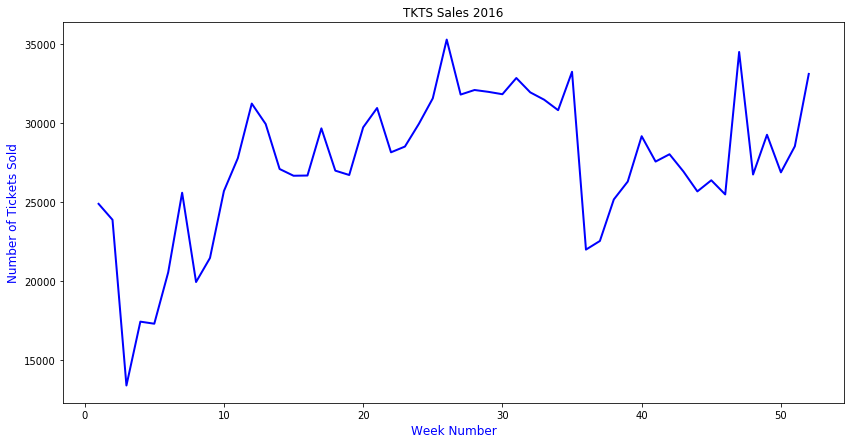

In [8]:
x = tktsSales.WeekNum
y = tktsSales.Total
fig,ax1 = plt.subplots(figsize=(14,7))
plt.title("TKTS Sales 2016")
ax1.plot(x,y,lw=2,color='blue')
ax1.set_xlabel(r"Week Number",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

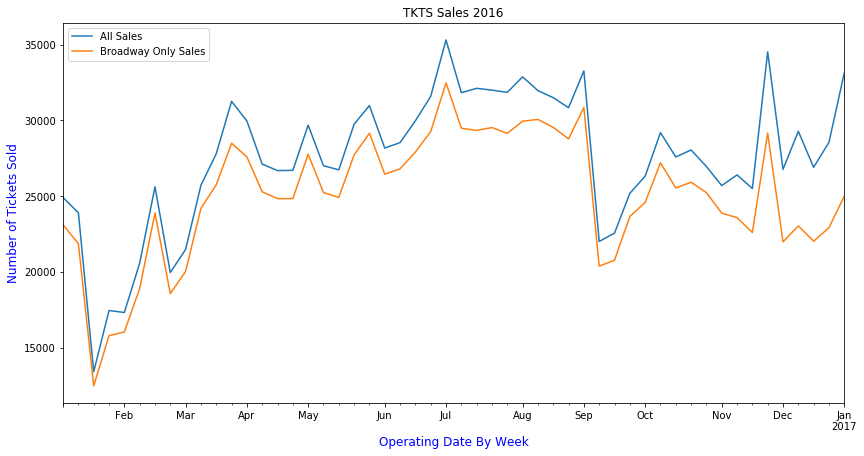

In [89]:
ax2016 = tktsSales.plot(x='SaleDate', y='Total', label='All Sales', figsize=(14,7),title="TKTS Sales 2016", grid=True)
ax2016b = tktsSales.plot(x='SaleDate', y='BwayOnlyTotal', label='Broadway Only Sales', ax=ax2016)
ax2016.set_xlabel(r"Operating Date By Week",fontsize=12,color='blue')
ax2016.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

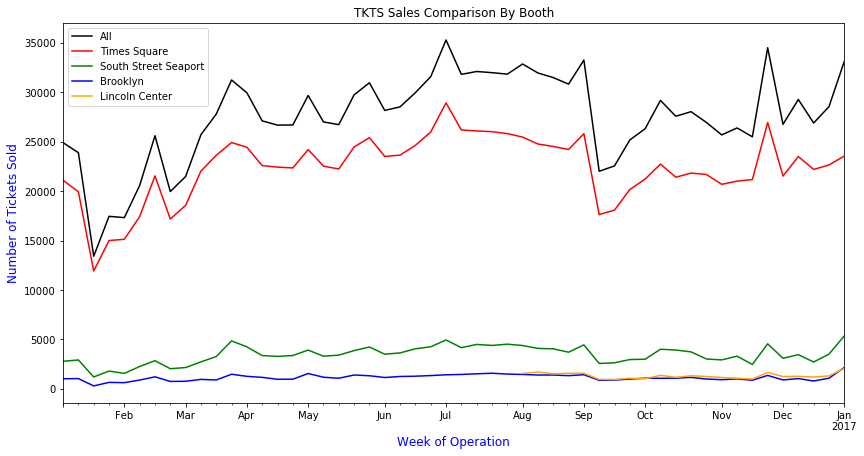

In [92]:
sALL = tktsSales.plot(x='SaleDate', y='Total', color='Black', label='All',figsize=(14,7),title="TKTS Sales Comparison By Booth")
sTiSq = tktsSales.plot(x='SaleDate', y='TiSq', color='Red', label='Times Square',ax=sALL)
sSSSP = tktsSales.plot(x='SaleDate', y='SSSP', color='Green', label='South Street Seaport',ax=sALL)
sBkln = tktsSales.plot(x='SaleDate', y='Bkln', color='Blue', label='Brooklyn',ax=sALL)
sLinc = tktsSales.plot(x='SaleDate', y='Linc', color='Orange', label='Lincoln Center',ax=sALL)

sALL.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sALL.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

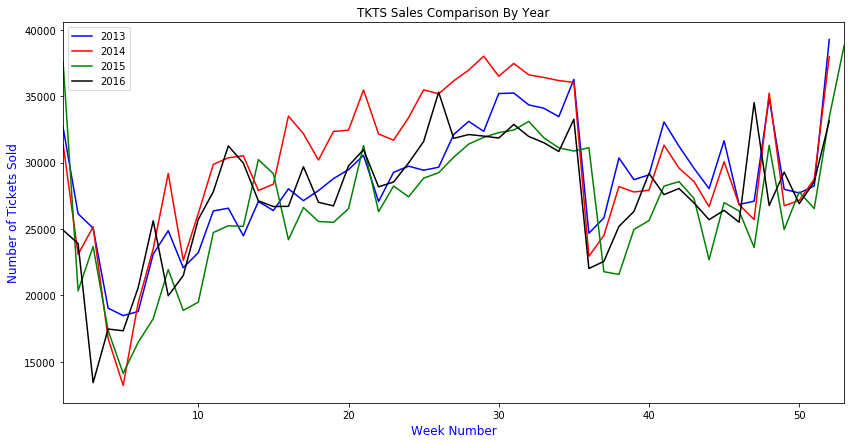

In [11]:
s2013 = tktsSales2013.plot(x='WeekNum', y='Total', color='Blue', label='2013',figsize=(14,7),title="TKTS Sales Comparison By Year")
s2014 = tktsSales2014.plot(x='WeekNum', y='Total', color='Red', label='2014',ax=s2013)
s2015 = tktsSales2015.plot(x='WeekNum', y='Total', color='Green', label='2015',ax=s2014)
s2016 = tktsSales.plot(x='WeekNum', y='Total', color='Black', label='2016',ax=s2015)

s2013.set_xlabel(r"Week Number",fontsize=12,color='blue')
s2013.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

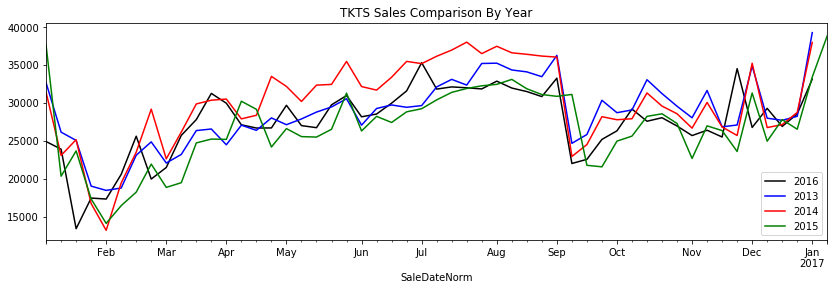

In [12]:
s2016 = tktsSales.plot(x='SaleDate', y='Total', color='Black', label='2016',figsize=(14,4),title="TKTS Sales Comparison By Year")
s2013 = tktsSales2013.plot(x='SaleDateNorm', y='Total', color='Blue', label='2013',ax=s2016)
s2014 = tktsSales2014.plot(x='SaleDateNorm', y='Total', color='Red', label='2014',ax=s2013)
s2015 = tktsSales2015.plot(x='SaleDateNorm', y='Total', color='Green', label='2015',ax=s2014)

#s2013.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
#s2013.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

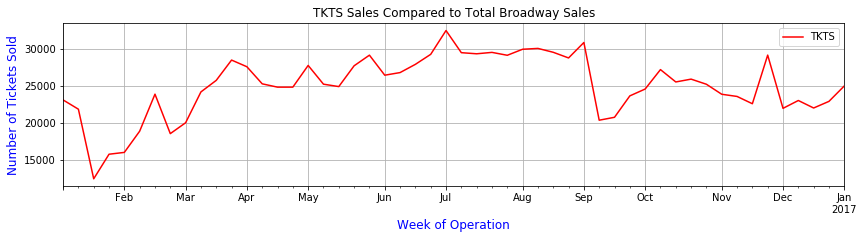

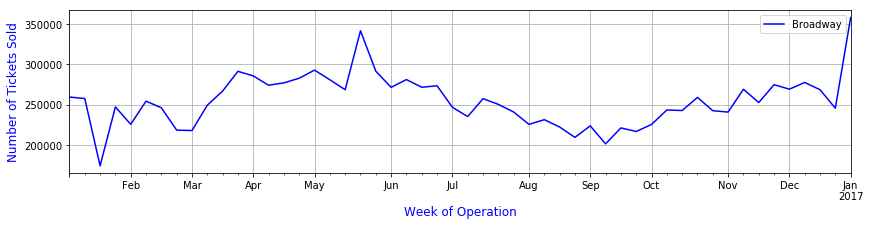

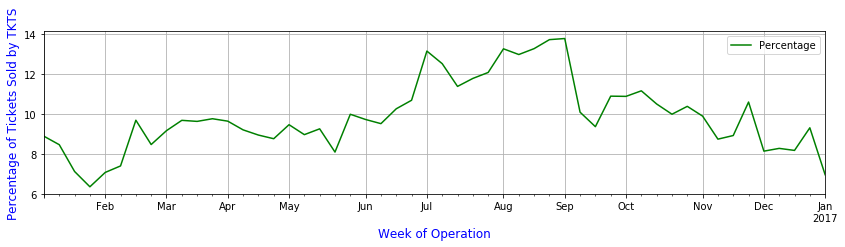

In [13]:
sBwayOnly = tktsSales.plot(x='SaleDate', y='BwayOnlyTotal', color='Red', label='TKTS',figsize=(14,3),title="TKTS Sales Compared to Total Broadway Sales", grid=True)
sVariety = tktsSales.plot(x='SaleDate', y='VarietyTotal', color='Blue', label='Broadway',figsize=(14,3), grid=True)
sTKTSPercent = tktsSales.plot(x='SaleDate', y='TKTSPercent', color='Green', label='Percentage',figsize=(14,3), grid=True)
sBwayOnly.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sBwayOnly.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')
sVariety.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sVariety.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')
sTKTSPercent.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sTKTSPercent.set_ylabel(r"Percentage of Tickets Sold by TKTS",fontsize=12,color='blue')

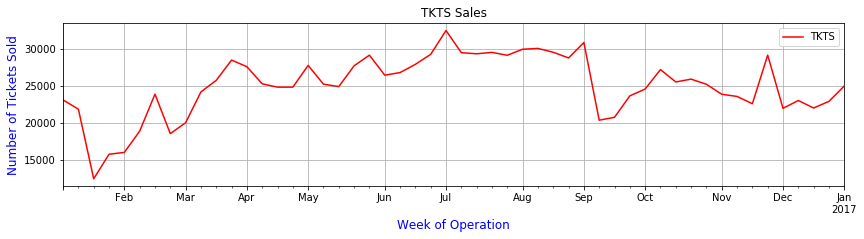

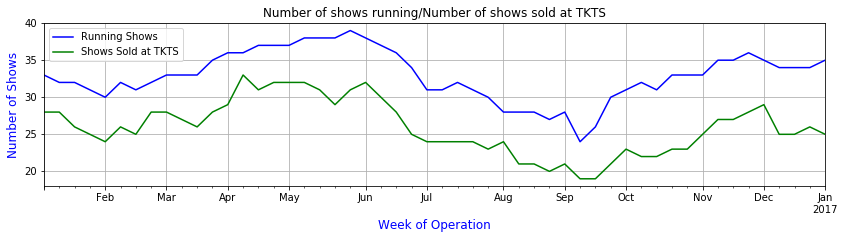

In [87]:
sTotals = tktsSales.plot(x='SaleDate', y='BwayOnlyTotal', color='Red', label='TKTS',figsize=(14,3),title="TKTS Sales", grid=True)
sShowsRunning = tktsSales.plot(x='SaleDate', y='ShowsRunning', color='Blue', label='Running Shows',figsize=(14,3),title="Number of shows running/Number of shows sold at TKTS", grid=True)
sShowsSold = tktsSales.plot(x='SaleDate', y='ShowsSold', color='Green', label='Shows Sold at TKTS',ax=sShowsRunning, grid=True)

sTotals.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sTotals.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')
sShowsRunning.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sShowsRunning.set_ylabel(r"Number of Shows",fontsize=12,color='blue')

# Building an ARIMA Time-Series Model

In [95]:
#Setting up the time series
ts = tktsSales[['SaleDate','Total']]
ts = ts.set_index('SaleDate')
ts = ts['Total']
ts.head()

SaleDate
2016-01-10    24910
2016-01-17    23901
2016-01-24    13417
2016-01-31    17457
2016-02-07    17326
Name: Total, dtype: int64

In [86]:
#Setting up the time series

#Combine all the years from 2013 to 2016 into one big series
ts2013 = tktsSales2013[['SaleDate','Total']]
ts2013 = ts2013.set_index('SaleDate')
ts2013 = ts2013['Total']

ts2014 = tktsSales2014[['SaleDate','Total']]
ts2014 = ts2014.set_index('SaleDate')
ts2014 = ts2014['Total']

ts2015 = tktsSales2015[['SaleDate','Total']]
ts2015 = ts2015.set_index('SaleDate')
ts2015 = ts2015['Total']

ts2016 = tktsSales[['SaleDate','Total']]
ts2016 = ts2016.set_index('SaleDate')
ts2016 = ts2016['Total']

ts = pd.concat([ts2013,ts2014,ts2015,ts2016])
ts.describe()

count      209.000000
mean     28224.947368
std       5023.369628
min      13203.000000
25%      25614.000000
50%      28227.000000
75%      31642.000000
max      39267.000000
Name: Total, dtype: float64

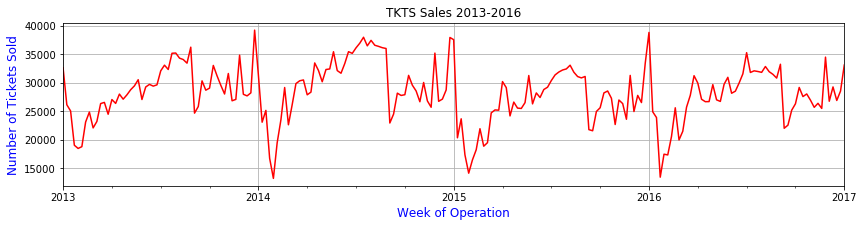

In [93]:
#Plot the series
ax1 = ts.plot(color='Red', label='TKTS',figsize=(14,3),title="TKTS Sales 2013-2016", grid=True)
ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')


In [18]:
#this code is taken from: 
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #Series.rolling(window=12,center=False).mean()
    rolmean = timeseries.rolling(window=52,center=False).mean()
    rolstd = timeseries.rolling(window=52,center=False).std()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=(14,4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

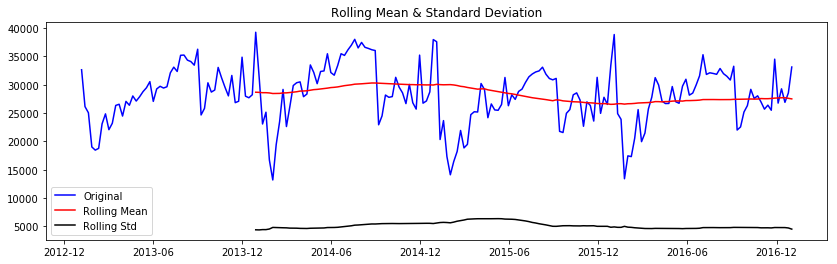

Results of Dickey-Fuller Test:
Test Statistic                  -3.431417
p-value                          0.009933
#Lags Used                       9.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64


In [19]:
#Test Stationarity
test_stationarity(ts)

p-value < .05
and Test Statistic is just below the 1% critical value, but greater than 5% critical value

So series is Stationary.

?


/Users/JonathanCalindas/anaconda/lib/python3.6/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


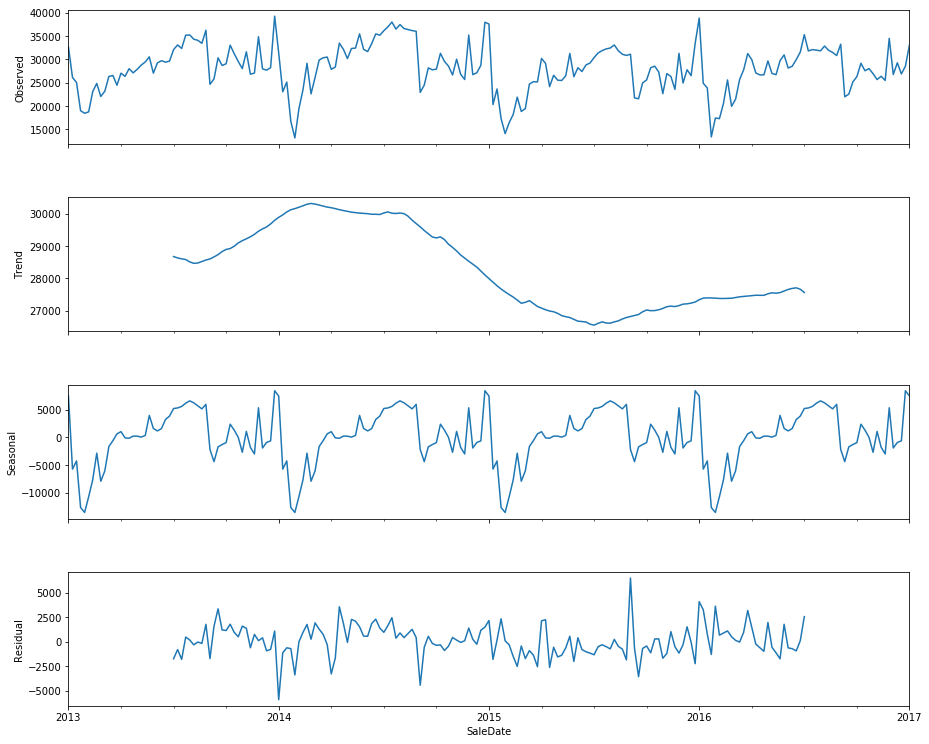

In [20]:
decomposition = seasonal_decompose(ts, freq=52)  
fig = plt.figure(figsize=(14,4))  
fig = decomposition.plot()  
fig.set_size_inches(15, 12)

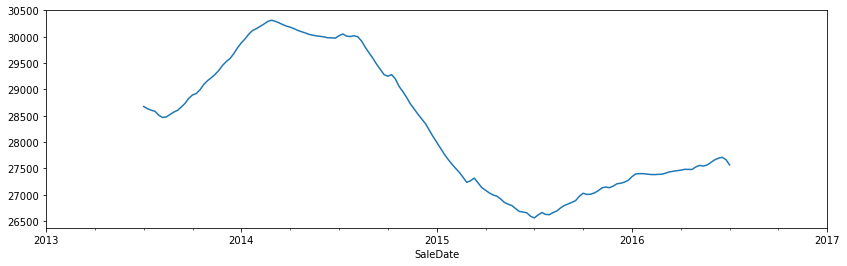

In [21]:
trend = decomposition.trend
fig = plt.figure(figsize=(14,4))  
fig = trend.plot()  
#fig.set_size_inches(15, 8) 

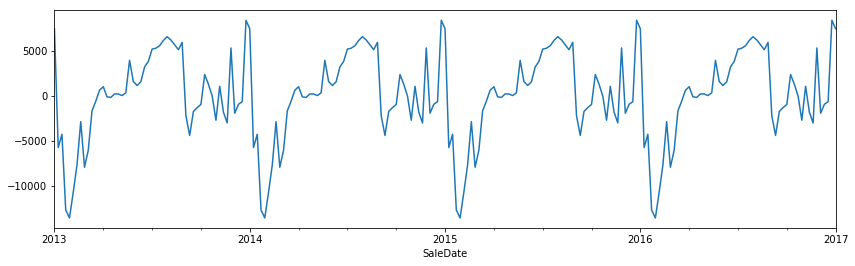

In [22]:
seasonal = decomposition.seasonal
fig = plt.figure(figsize=(14,4))  
fig = seasonal.plot()  
#fig.set_size_inches(15, 8)

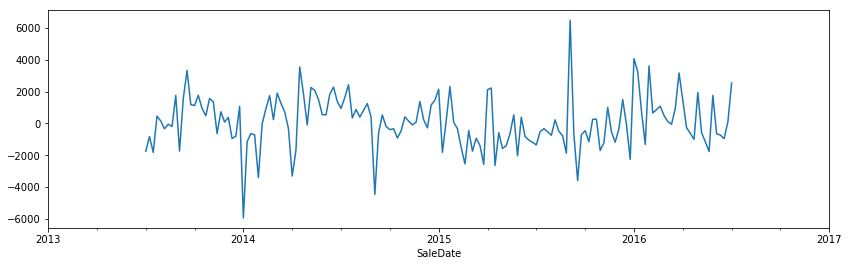

In [23]:
residual = decomposition.resid
fig = plt.figure(figsize=(14,4))  
fig = residual.plot()  
#fig.set_size_inches(15, 8)

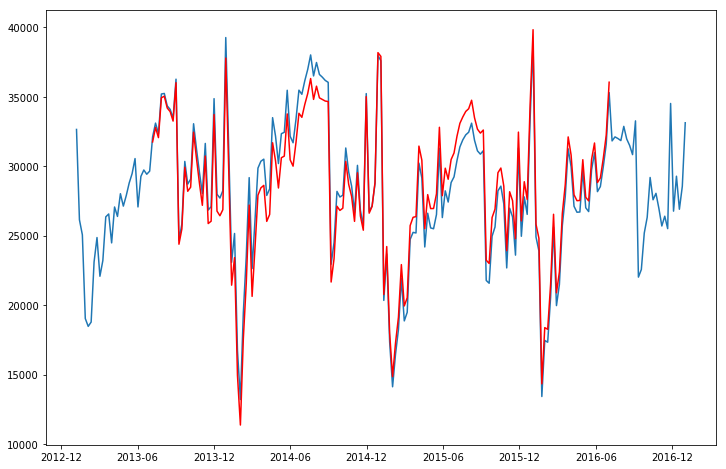

In [24]:
#Validate
trend_avg = trend.mean()
validate = seasonal + residual + trend_avg
plt.figure(figsize=(12,8))
plt.plot(ts)
plt.plot(validate, color='red')



In [96]:
residual.dropna().head()

SaleDate
2013-07-07   -1755.109205
2013-07-14    -820.589173
2013-07-21   -1820.749430
2013-07-28     462.385186
2013-08-04     155.891596
Name: Total, dtype: float64

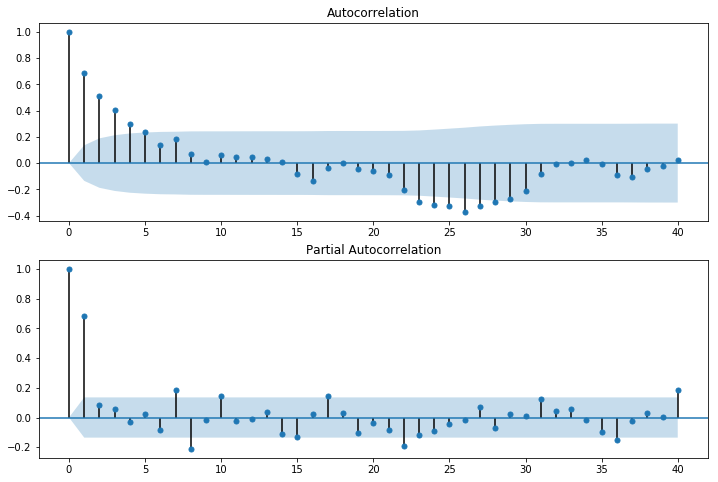

In [26]:
#ACF and PACF Plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts.iloc[:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts.iloc[:], lags=40, ax=ax2)

ACF trends slowly down, but PACF drops sharply after 2, so this is an AR(2) 

We will first try p = 2, d = 0, q = 0

In [27]:
#Fit the ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


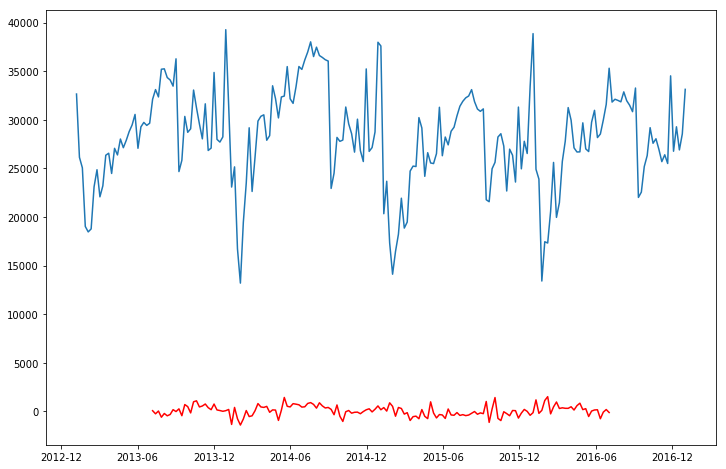

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                  157
Model:                     ARMA(4, 0)   Log Likelihood               -1374.317
Method:                       css-mle   S.D. of innovations           1530.864
Date:                Thu, 04 May 2017   AIC                           2760.633
Time:                        00:15:46   BIC                           2778.971
Sample:                    07-07-2013   HQIC                          2768.081
                         - 07-03-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          82.3465    215.307      0.382      0.703      -339.648   504.341
ar.L1.Total     0.1610      0.079      2.039      0.043         0.006     0.316
ar.L2.Total    -0.0898      0.078     -1.149      0.253        -0.243     0.063
ar.L3.Total     0.1695      0.079      2.157      0.033         0.016     0.323
ar.L4.Total     0.1998      0.079      2.538      0.012         0.045     0.354
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2998           -0.0000j            1.2998           -0.0000
AR.2           -0.0957           -1.3996j            1.4028           -0.2609
AR.3           -0.0957           +1.3996j            1.4028            0.2609
AR.4           -1.9568           -0.0000j            1.9568           -0.5000
-----------------------------------------------------------------------------
"""

In [28]:
#AR Model
ts_fl = ts.astype(float)
model = ARIMA(residual.dropna(), order=(4, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(12,8))
plt.plot(ts_fl)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show(block=False)
results_AR.summary()

In [29]:
results_AR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 2778.9707 
Dependent Variable: Total            Log-Likelihood:      -1374.3   
Date:               2017-05-04 00:15 Scale:               1.0000    
No. Observations:   157              Method:              css-mle   
Df Model:           5                Sample:              07-07-2013
Df Residuals:       152                                   07-03-2016
Converged:          1.0000           S.D. of innovations: 1530.864  
AIC:                2760.6332        HQIC:                2768.081  
---------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|     [0.025    0.975] 
---------------------------------------------------------------------
const         82.3465  215.3074   0.3825  0.7027  -339.6483  504.3413
ar.L1.Total    0.1610    0.0790   2.0389  0.0432     0.0062    0.3158
ar.L2.Total   -0.0898    0.0782  -1.1485  0.2526    -0.2432    0.0635
ar.L3.Total    0.1695    0.0786   2.1573  0.0326     0.0155    0.3235
ar.L4.Total    0.1998    0.0787   2.5378  0.0122     0.0455    0.3541
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.2998            -0.0000           1.2998            -0.0000
AR.2           -0.0957            -1.3996           1.4028            -0.2609
AR.3           -0.0957             1.3996           1.4028             0.2609
AR.4           -1.9568            -0.0000           1.9568            -0.5000
====================================================================

"""

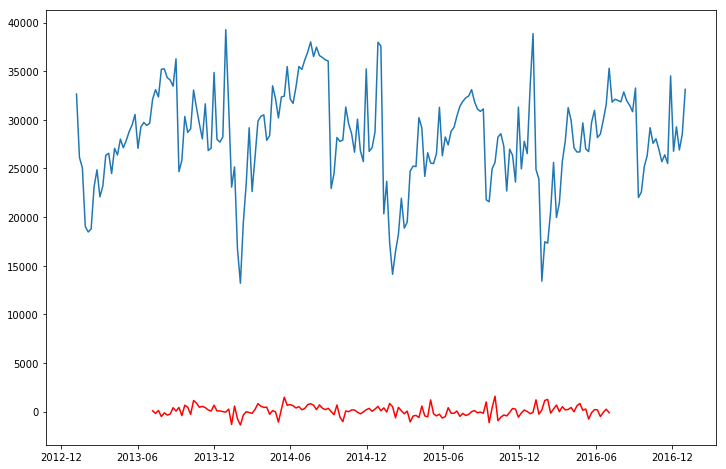

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                  157
Model:                     ARMA(0, 4)   Log Likelihood               -1374.395
Method:                       css-mle   S.D. of innovations           1531.587
Date:                Thu, 04 May 2017   AIC                           2760.789
Time:                        02:48:10   BIC                           2779.127
Sample:                    07-07-2013   HQIC                          2768.237
                         - 07-03-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          88.9733    179.413      0.496      0.621      -262.670   440.617
ma.L1.Total     0.1516      0.079      1.923      0.056        -0.003     0.306
ma.L2.Total    -0.0798      0.079     -1.012      0.313        -0.234     0.075
ma.L3.Total     0.1480      0.076      1.938      0.054        -0.002     0.298
ma.L4.Total     0.2572      0.076      3.364      0.001         0.107     0.407
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.8985           -1.0186j            1.3583           -0.1350
MA.2            0.8985           +1.0186j            1.3583            0.1350
MA.3           -1.1861           -0.8370j            1.4517           -0.4022
MA.4           -1.1861           +0.8370j            1.4517            0.4022
-----------------------------------------------------------------------------
"""

In [58]:
#MA Model
ts_fl = ts.astype(float)
model = ARIMA(residual.dropna(), order=(0, 0, 4))  
results_MA = model.fit(disp=-1) 
plt.figure(figsize=(12,8))
plt.plot(ts_fl)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show(block=False)
results_MA.summary()

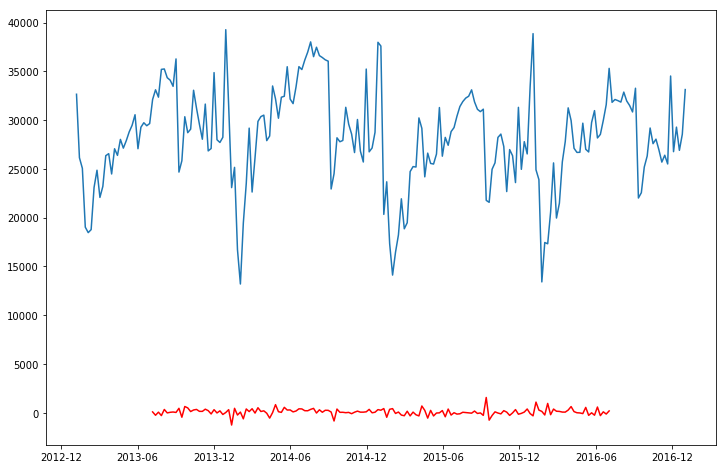

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Total   No. Observations:                  157
Model:                     ARMA(1, 1)   Log Likelihood               -1380.394
Method:                       css-mle   S.D. of innovations           1592.727
Date:                Thu, 04 May 2017   AIC                           2768.788
Time:                        02:48:12   BIC                           2781.013
Sample:                    07-07-2013   HQIC                          2773.753
                         - 07-03-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          95.7227    147.796      0.648      0.518      -193.953   385.398
ar.L1.Total    -0.2566      0.246     -1.045      0.298        -0.738     0.225
ma.L1.Total     0.4620      0.220      2.104      0.037         0.032     0.892
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.8979           +0.0000j            3.8979            0.5000
MA.1           -2.1643           +0.0000j            2.1643            0.5000
-----------------------------------------------------------------------------
"""

In [59]:
#Combined AR MA
ts_fl = ts.astype(float)
model = ARIMA(residual.dropna(), order=(1, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(12,8))
plt.plot(ts_fl)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show(block=False)
results_ARIMA.summary()

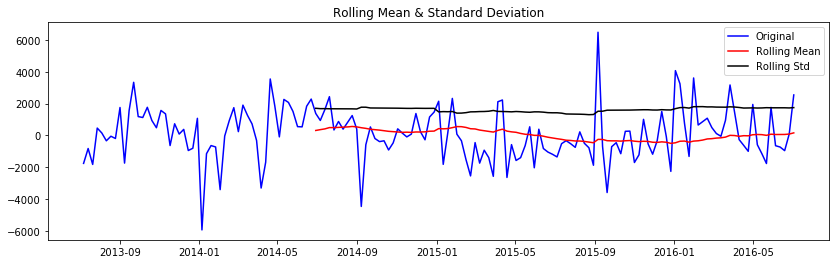

Results of Dickey-Fuller Test:
Test Statistic                  -4.188552
p-value                          0.000689
#Lags Used                       3.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [60]:
#Test the stationarity of the residuals
test_stationarity(residual.dropna())

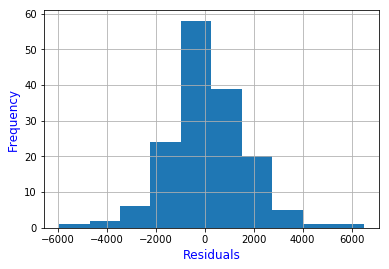

In [94]:
#Do the residuals follow a normal distribution?
ax1 = residual.hist()
ax1.set_xlabel(r"Residuals",fontsize=12,color='blue')
ax1.set_ylabel(r"Frequency",fontsize=12,color='blue')


In [62]:
#Predictions
forecast_AR = results_AR.forecast(steps=52)
#predict = results_AR.predict()
forecast_AR[0]  #forecasted values

array([ 140.37021237, -335.57024237,  428.50077262,  677.36942434,
         87.821162  ,    4.94930245,  239.40188297,  234.39323701,
         80.69554616,   79.5782941 ,  139.19742577,  121.84623677,
         82.8004867 ,   87.95389678,  101.26155516,   92.85688308,
         83.38074595,   85.89507046,   88.3853691 ,   85.27520689,
         83.08365458,   83.93458883,   84.23886093,   83.21859143,
         82.73335971,   82.96846082,   82.93776848,   82.62562718,
         82.52102909,   82.57399583,   82.53288348,   82.44141522,
         82.41846064,   82.42659534,   82.40625043,   82.38007901,
         82.37448536,   82.37411267,   82.36605467,   82.35861389,
         82.35695897,   82.35592071,   82.35303117,   82.35089211,
         82.35030065,   82.34970039,   82.34871703,   82.34808501,
         82.34785168,   82.34758429,   82.34725861,   82.34706437])

In [63]:
forecast_AR[1]  #std err of the forecast

array([ 1530.86388951,  1550.58682246,  1553.67080034,  1569.39126541,
        1617.629912  ,  1619.40956119,  1619.4172669 ,  1622.696032  ,
        1626.30266093,  1626.45809241,  1626.49116936,  1626.949045  ,
        1627.23905864,  1627.25741723,  1627.27290196,  1627.32779842,
        1627.35247719,  1627.35522366,  1627.35869259,  1627.36480953,
        1627.36707244,  1627.36751708,  1627.36810005,  1627.3687596 ,
        1627.36898592,  1627.36905683,  1627.36914112,  1627.36921172,
        1627.36923633,  1627.36924711,  1627.36925827,  1627.3692659 ,
        1627.36926877,  1627.36927032,  1627.36927172,  1627.36927257,
        1627.36927291,  1627.36927313,  1627.3692733 ,  1627.36927339,
        1627.36927344,  1627.36927347,  1627.36927349,  1627.3692735 ,
        1627.3692735 ,  1627.36927351,  1627.36927351,  1627.36927351,
        1627.36927351,  1627.36927351,  1627.36927351,  1627.36927351])

In [64]:
forecast_AR[2]  #confidence interval of the forecast

array([[-2860.0678763 ,  3140.80830105],
       [-3374.66456929,  2703.52408455],
       [-2616.63803988,  3473.63958512],
       [-2398.58093353,  3753.3197822 ],
       [-3082.67520584,  3258.31752983],
       [-3169.03511369,  3178.93371859],
       [-2934.5976361 ,  3413.40140205],
       [-2946.03254357,  3414.81901759],
       [-3106.79909722,  3268.19018955],
       [-3108.22098939,  3267.3775776 ],
       [-3048.66668734,  3327.06153888],
       [-3066.91529611,  3310.60776965],
       [-3106.52946247,  3272.13043587],
       [-3101.41203456,  3277.31982812],
       [-3088.1347257 ,  3290.65783602],
       [-3096.64699287,  3282.36075903],
       [-3106.17149949,  3272.9329914 ],
       [-3103.66255796,  3275.45269889],
       [-3101.1790583 ,  3277.9497965 ],
       [-3104.30120951,  3274.85162328],
       [-3106.49719703,  3272.66450619],
       [-3105.64713425,  3273.51631191],
       [-3105.34400476,  3273.82172663],
       [-3106.36556696,  3272.80274981],
       [-3106.85

In [65]:
#Predictions
forecast_MA = results_MA.forecast(steps=52)
#predict = results_AR.predict()
forecast_MA[0]  #forecasted values

array([ 316.53329695, -373.27265537,  440.16414496,  772.14169493,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805,
         88.97326805,   88.97326805,   88.97326805,   88.97326805])

In [66]:
forecast_MA[1] #std err

array([ 1531.58673407,  1549.08512214,  1553.90419341,  1570.3407026 ,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622,
        1618.99516622,  1618.99516622,  1618.99516622,  1618.99516622])

In [67]:
forecast_MA[2] #confidence interval

array([[-2685.32154103,  3318.38813493],
       [-3409.42370375,  2662.87839301],
       [-2605.43210954,  3485.76039947],
       [-2305.66952563,  3849.95291549],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19894889,  3262.14548499],
       [-3084.19

In [68]:
#Predictions
forecast_ARIMA = results_ARIMA.forecast(steps=52)
#predict = results_AR.predict()
forecast_ARIMA[0]  #forecasted values

array([ 552.75658994,  -21.530076  ,  125.80413734,   88.00529626,
         97.70265273,   95.21477956,   95.85304762,   95.68929887,
         95.73130889,   95.72053115,   95.7232962 ,   95.72258682,
         95.72276881,   95.72272212,   95.7227341 ,   95.72273103,
         95.72273181,   95.72273161,   95.72273166,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165,
         95.72273165,   95.72273165,   95.72273165,   95.72273165])

In [69]:
forecast_ARIMA[1]  #std err of the forecast

array([ 1592.72744281,  1626.00470464,  1628.17111717,  1628.31360667,
        1628.32298472,  1628.32360197,  1628.3236426 ,  1628.32364527,
        1628.32364545,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546,
        1628.32364546,  1628.32364546,  1628.32364546,  1628.32364546])

In [70]:
forecast_ARIMA[2]  #confidence interval of the forecast

array([[-2568.93183516,  3674.44501504],
       [-3208.44073579,  3165.38058378],
       [-3065.35261298,  3316.96088766],
       [-3103.43072836,  3279.44132087],
       [-3093.75175252,  3289.15705798],
       [-3096.24083548,  3286.6703946 ],
       [-3095.60264704,  3287.30874228],
       [-3095.76640103,  3287.14499878],
       [-3095.72439136,  3287.18700914],
       [-3095.73516912,  3287.17623142],
       [-3095.73240408,  3287.17899647],
       [-3095.73311346,  3287.17828709],
       [-3095.73293146,  3287.17846909],
       [-3095.73297815,  3287.17842239],
       [-3095.73296618,  3287.17843437],
       [-3095.73296925,  3287.1784313 ],
       [-3095.73296846,  3287.17843209],
       [-3095.73296866,  3287.17843189],
       [-3095.73296861,  3287.17843194],
       [-3095.73296862,  3287.17843192],
       [-3095.73296862,  3287.17843193],
       [-3095.73296862,  3287.17843193],
       [-3095.73296862,  3287.17843193],
       [-3095.73296862,  3287.17843193],
       [-3095.73

In [71]:
#Append Partial Year 2017 to ts
ts2017 = tktsSales2017[['SaleDate','Total']]
ts2017 = ts2017.set_index('SaleDate')
ts2017 = ts2017['Total']

ts_full = pd.concat([ts2013,ts2014,ts2015,ts2016,ts2017])
ts_full.head()

SaleDate
2013-01-06    32649.0
2013-01-13    26144.0
2013-01-20    25060.0
2013-01-27    19030.0
2013-02-03    18469.0
Name: Total, dtype: float64

In [72]:
seasonal_FY = seasonal.tail(26)  #The last half of a year
seasonal_FY = seasonal_FY.append(seasonal.head(26)) #Append first half of a year
seasonal_FY.values

array([  5.29585840e+03,   5.57052828e+03,   6.15656674e+03,
         6.57680071e+03,   6.21703148e+03,   5.66910840e+03,
         5.13246097e+03,   5.94782956e+03,  -2.18820570e+03,
        -4.38630826e+03,  -1.72524416e+03,  -1.30026660e+03,
        -9.46923647e+02,   2.37046097e+03,   1.29873020e+03,
        -1.16255701e+01,  -2.69568326e+03,   1.06826866e+03,
        -1.80292044e+03,  -3.00158390e+03,   5.32514046e+03,
        -1.92185954e+03,  -9.30849929e+02,  -6.34769801e+02,
         8.40093853e+03,   7.44950263e+03,   7.44950263e+03,
        -5.72994929e+03,  -4.25707429e+03,  -1.26627025e+04,
        -1.35438820e+04,  -1.07102762e+04,  -7.67138839e+03,
        -2.85359672e+03,  -7.92088519e+03,  -6.04234031e+03,
        -1.66096531e+03,  -5.95099929e+02,   6.28480199e+02,
         1.02193212e+03,  -1.02176852e+02,  -1.68430057e+02,
         2.21444943e+02,   2.11778276e+02,   3.89705837e+01,
         3.42114814e+02,   3.95094815e+03,   1.59914046e+03,
         1.15616930e+03,

In [73]:
forecast_AR_DF = pd.DataFrame(ts_full.tail(52))  #Last half of 2016 and first 26 of 2017
forecast_AR_DF['forecast_residuals'] = forecast_AR[0]

seasonal_FY = seasonal.tail(26)  #The last half of a year
seasonal_FY = seasonal_FY.append(seasonal.head(26)) #Append first half of a year
forecast_AR_DF['seasonal_values'] = seasonal_FY.values
#forecast_AR_DF['trend_values'] = trend.mean()
trend_val = trend.dropna().tail(1).mean()
forecast_AR_DF['trend_values'] = trend_val
forecast_AR_DF['forecast'] = forecast_AR_DF.forecast_residuals + forecast_AR_DF.seasonal_values + forecast_AR_DF.trend_values

forecast_AR_DF.head()

,Total,forecast_residuals,seasonal_values,trend_values,forecast
SaleDate,,,,,
2016-07-10,31824.0,140.370212,5295.858404,27563.567308,32999.795924
2016-07-17,32113.0,-335.570242,5570.528276,27563.567308,32798.525341
2016-07-24,31995.0,428.500773,6156.566738,27563.567308,34148.634818
2016-07-31,31846.0,677.369424,6576.800712,27563.567308,34817.737444
2016-08-07,32871.0,87.821162,6217.031481,27563.567308,33868.419951


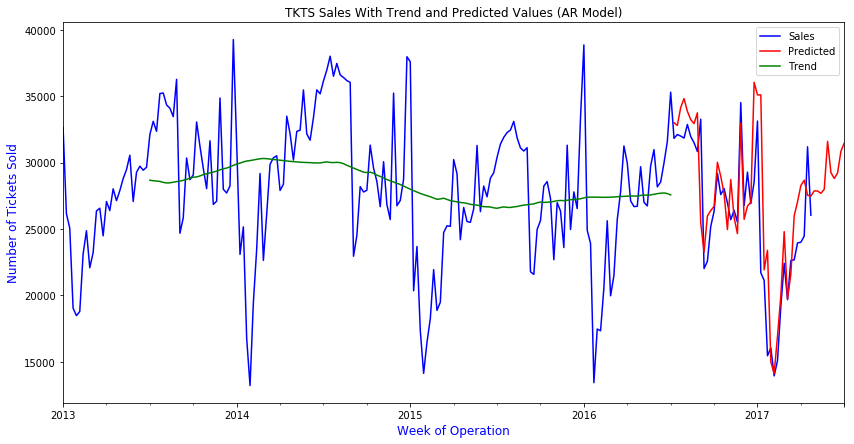

In [74]:
#plt.figure(figsize=(15,8))
#plt.plot(ts_full)
#plt.plot(forecast_AR_DF.forecast, color='red')
#plt.plot(trend, color='green')

ax1 = ts_full.plot(color='blue', label='Sales',figsize=(14,7),title="TKTS Sales With Trend and Predicted Values (AR Model)",legend=True)
ax2 = forecast_AR_DF.forecast.plot(color='red', label='Predicted',ax=ax1,legend=True)
ax3 = trend.plot(color='green', label='Trend',ax=ax2,legend=True)
ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

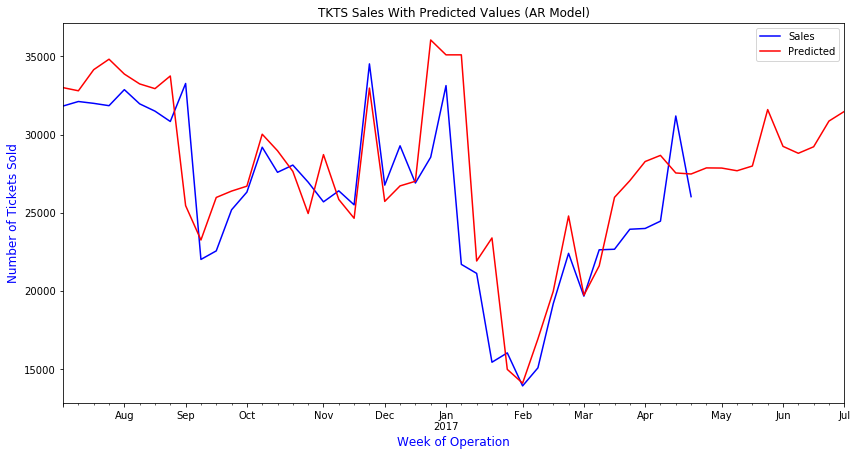

In [75]:
#plt.figure(figsize=(15,8))
#plt.plot(ts_full.tail(52))
#plt.plot(forecast_AR_DF.forecast, color='red')

ax1 = ts_full.tail(52).plot(color='blue', label='Sales',figsize=(14,7),title="TKTS Sales With Predicted Values (AR Model)",legend=True)
ax2 = forecast_AR_DF.forecast.plot(color='red', label='Predicted',ax=ax1,legend=True)
ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

In [76]:
#Calculate Root Mean Squared Error
RMSE_DF = forecast_AR_DF[forecast_AR_DF.Total.notnull()]
RMSE_AR = np.sqrt(((RMSE_DF.forecast - RMSE_DF.Total) ** 2).mean())
RMSE_AR

3513.8372560973926

In [77]:
forecast_MA_DF = pd.DataFrame(ts_full.tail(52))  #Last half of 2016 and first 26 of 2017
forecast_MA_DF['forecast_residuals'] = forecast_MA[0]

seasonal_FY = seasonal.tail(26)  #The last half of a year
seasonal_FY = seasonal_FY.append(seasonal.head(26)) #Append first half of a year
forecast_MA_DF['seasonal_values'] = seasonal_FY.values
trend_val = trend.dropna().tail(1).mean()
forecast_MA_DF['trend_values'] = trend_val
forecast_MA_DF['forecast'] = forecast_MA_DF.forecast_residuals + forecast_MA_DF.seasonal_values + forecast_MA_DF.trend_values

forecast_MA_DF.head()

,Total,forecast_residuals,seasonal_values,trend_values,forecast
SaleDate,,,,,
2016-07-10,31824.0,316.533297,5295.858404,27563.567308,33175.959009
2016-07-17,32113.0,-373.272655,5570.528276,27563.567308,32760.822928
2016-07-24,31995.0,440.164145,6156.566738,27563.567308,34160.298190
2016-07-31,31846.0,772.141695,6576.800712,27563.567308,34912.509715
2016-08-07,32871.0,88.973268,6217.031481,27563.567308,33869.572057


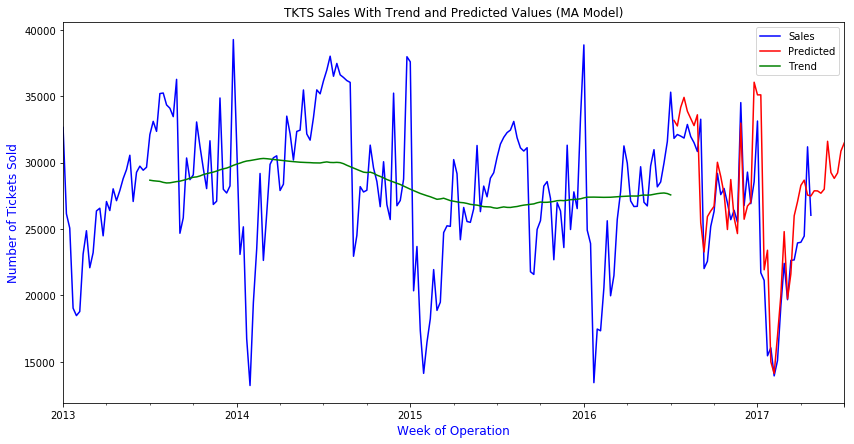

In [78]:
#plt.figure(figsize=(15,8))
#plt.plot(ts_full)
#plt.plot(forecast_MA_DF.forecast, color='red')
#plt.plot(trend, color='green')

ax1 = ts_full.plot(color='blue', label='Sales',figsize=(14,7),title="TKTS Sales With Trend and Predicted Values (MA Model)",legend=True)
ax2 = forecast_MA_DF.forecast.plot(color='red', label='Predicted',ax=ax1,legend=True)
ax3 = trend.plot(color='green', label='Trend',ax=ax2,legend=True)
ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

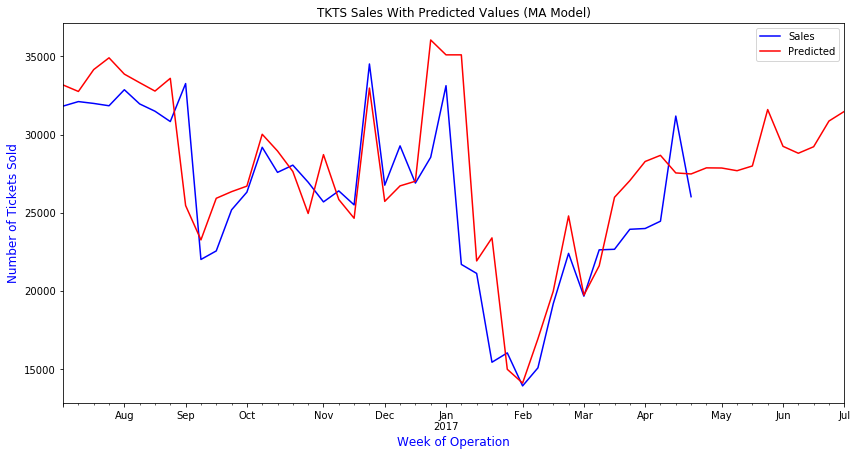

In [79]:
#plt.figure(figsize=(15,8))
#plt.plot(ts_full.tail(52))
#plt.plot(forecast_MA_DF.forecast, color='red')

ax1 = ts_full.tail(52).plot(color='blue', label='Sales',figsize=(14,7),title="TKTS Sales With Predicted Values (MA Model)",legend=True)
ax2 = forecast_MA_DF.forecast.plot(color='red', label='Predicted',ax=ax1,legend=True)
ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

In [80]:
#Calculate Root Mean Squared Error
RMSE_DF = forecast_MA_DF[forecast_MA_DF.Total.notnull()]
RMSE_MA = np.sqrt(((RMSE_DF.forecast - RMSE_DF.Total) ** 2).mean())
RMSE_MA

3513.8281572527158

In [81]:
forecast_ARIMA_DF = pd.DataFrame(ts_full.tail(52))  #Last half of 2016 and first 26 of 2017
forecast_ARIMA_DF['forecast_residuals'] = forecast_ARIMA[0]

seasonal_FY = seasonal.tail(26)  #The last half of a year
seasonal_FY = seasonal_FY.append(seasonal.head(26)) #Append first half of a year
forecast_ARIMA_DF['seasonal_values'] = seasonal_FY.values
trend_val = trend.dropna().tail(1).mean()
forecast_ARIMA_DF['trend_values'] = trend_val
forecast_ARIMA_DF['forecast'] = forecast_ARIMA_DF.forecast_residuals + forecast_ARIMA_DF.seasonal_values + forecast_ARIMA_DF.trend_values

forecast_ARIMA_DF.head()

,Total,forecast_residuals,seasonal_values,trend_values,forecast
SaleDate,,,,,
2016-07-10,31824.0,552.756590,5295.858404,27563.567308,33412.182302
2016-07-17,32113.0,-21.530076,5570.528276,27563.567308,33112.565508
2016-07-24,31995.0,125.804137,6156.566738,27563.567308,33845.938183
2016-07-31,31846.0,88.005296,6576.800712,27563.567308,34228.373316
2016-08-07,32871.0,97.702653,6217.031481,27563.567308,33878.301442


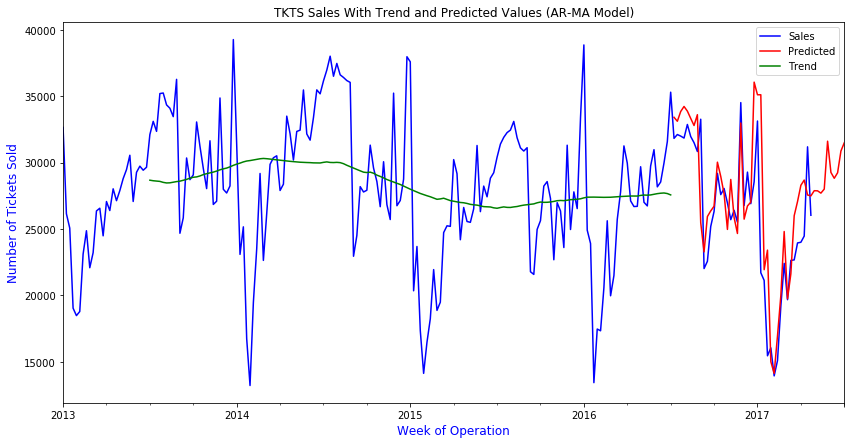

In [82]:
#plt.figure(figsize=(15,8))
#plt.plot(ts_full)
#plt.plot(forecast_ARIMA_DF.forecast, color='red')
#plt.plot(trend, color='green')

ax1 = ts_full.plot(color='blue', label='Sales',figsize=(14,7),title="TKTS Sales With Trend and Predicted Values (AR-MA Model)",legend=True)
ax2 = forecast_ARIMA_DF.forecast.plot(color='red', label='Predicted',ax=ax1,legend=True)
ax3 = trend.plot(color='green', label='Trend',ax=ax2,legend=True)
ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

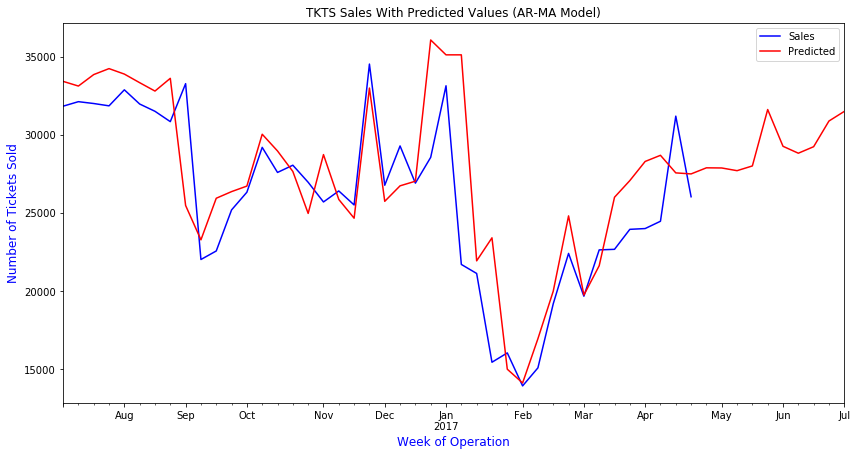

In [83]:
#plt.figure(figsize=(15,8))
#plt.plot(ts_full.tail(52))
#plt.plot(forecast_ARIMA_DF.forecast, color='red')

ax1 = ts_full.tail(52).plot(color='blue', label='Sales',figsize=(14,7),title="TKTS Sales With Predicted Values (AR-MA Model)",legend=True)
ax2 = forecast_ARIMA_DF.forecast.plot(color='red', label='Predicted',ax=ax1,legend=True)
ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

In [84]:
#Calculate Root Mean Squared Error
RMSE_DF = forecast_ARIMA_DF[forecast_ARIMA_DF.Total.notnull()]
RMSE_ARIMA = np.sqrt(((RMSE_DF.forecast - RMSE_DF.Total) ** 2).mean())
RMSE_ARIMA

3503.467606018934

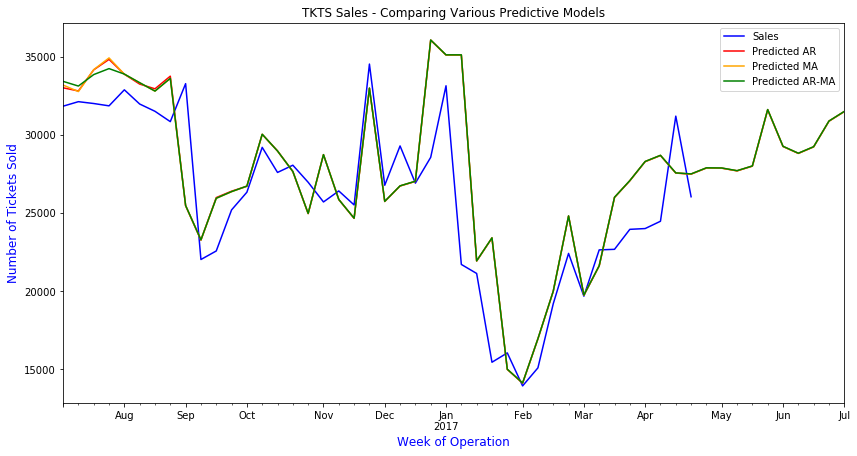

In [85]:
#Compare AR model, MA Model, and combined ARIMA Model
#plt.figure(figsize=(15,8))
#plt.plot(ts_full.tail(52))
#plt.plot(forecast_AR_DF.forecast, color='orange')
#plt.plot(forecast_MA_DF.forecast, color='red')
#plt.plot(forecast_ARIMA_DF.forecast, color='green')

ax1 = ts_full.tail(52).plot(color='blue', label='Sales',figsize=(14,7),title="TKTS Sales - Comparing Various Predictive Models", legend=True)
ax2 = forecast_AR_DF.forecast.plot(color='red', label='Predicted AR', legend=True ,ax=ax1)
ax2 = forecast_MA_DF.forecast.plot(color='orange', label='Predicted MA', legend=True ,ax=ax1)
ax2 = forecast_ARIMA_DF.forecast.plot(color='green', label='Predicted AR-MA', legend=True ,ax=ax1)

ax1.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')